<a href="https://colab.research.google.com/github/juandiego2205/Biosenales/blob/main/PF_KevinGarcia/ParcialF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PARCIAL FINAL**
***Kevin Estiven Garcia Jaramillo***

***CC: 1001132918***





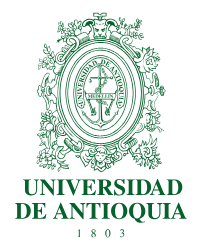


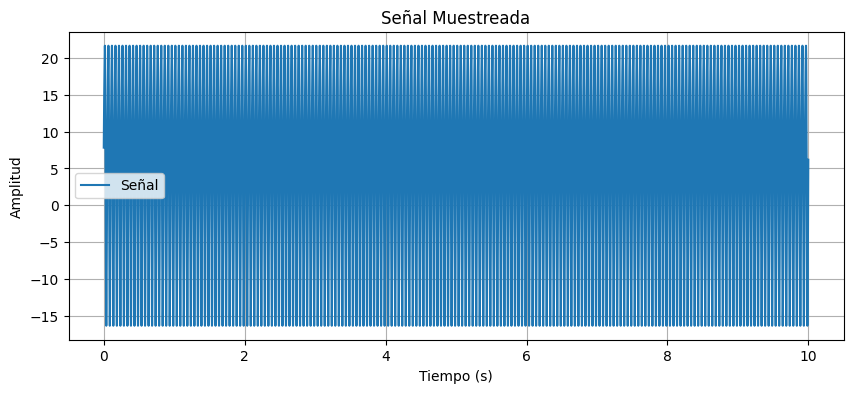

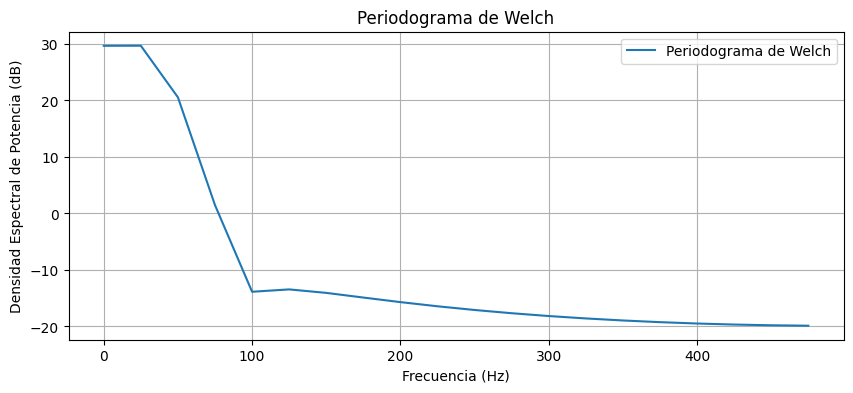

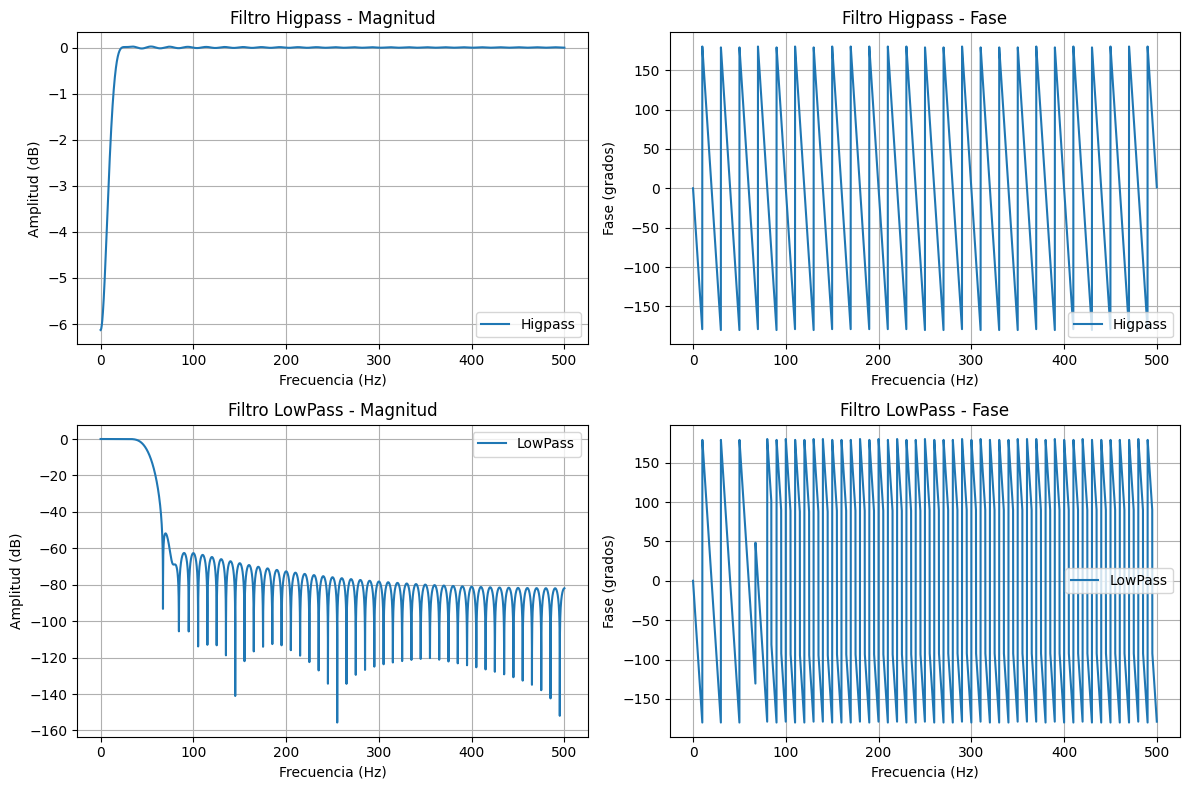

<Figure size 640x480 with 0 Axes>

In [2]:
# Punto 4 - Muestreo de la señal
# ---------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz



# Parámetros iniciales
a = 8  # Número de tu cédula
k = 2 * (a + 1)  # Cálculo de k
fs = 1000  # Frecuencia de muestreo (Hz)
t = np.linspace(0, 10, fs * 10, endpoint=False)  # 10 segundos de señal

# Definición de la señal x(t) para el grupo de Luisa
x_t = 4 * np.cos(80 * np.pi * t + (np.pi / 4)) + k * np.sin(40 * np.pi * t) + 5

# Graficar la señal x(t)
plt.figure(figsize=(10, 4))
plt.plot(t, x_t, label="Señal")
plt.title("Señal Muestreada")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()

# Punto 5 - Periodograma de Welch
# ---------------------------------
def welch_periodogram(signal, M, S, window_func):
    n_segments = (len(signal) - S) // (M - S)  # Calcular el número de segmentos
    periodogram_avg = np.zeros(M)  # Inicializar el promedio del periodograma

    for i in range(n_segments):  # Calcular el periodograma para cada segmento
        start = i * (M - S)
        end = start + M
        segment = signal[start:end]
        windowed_segment = segment * window_func(M)  # Aplicar la ventana
        spectrum = np.fft.fft(windowed_segment)  # Transformada de Fourier
        periodogram = (np.abs(spectrum) ** 2) / M  # Periodograma modificado
        periodogram_avg += periodogram  # Sumar al promedio

    periodogram_avg /= n_segments  # Promediar los periodogramas
    freqs = np.fft.fftfreq(M, d=1/fs)  # Calcular las frecuencias

    return freqs[:M // 2], periodogram_avg[:M // 2]

# Configuración de parámetros para el periodograma
M = 40  # Tamaño del segmento
S = 30  # Solapamiento
window = np.hamming  # Ventana Hamming

# Calcular el periodograma
freqs, periodogram = welch_periodogram(x_t, M, S, window)

# Graficar el periodograma
plt.figure(figsize=(10, 4))
plt.plot(freqs, 10 * np.log10(periodogram), label="Periodograma de Welch")
plt.title("Periodograma de Welch")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad Espectral de Potencia (dB)")
plt.legend()
plt.grid()
plt.show()
# Parámetros generales
a = 5  # Frecuencia de corte inferior (Hz)
b = 50  # Frecuencia de corte superior (Hz)
fs = 1000  # Frecuencia de muestreo (Hz)
nyquist = fs / 2  # Frecuencia de Nyquist

# Definir filtros y sus propiedades en un diccionario
filters = {
    "HighPass": {
        "cutoff": a / nyquist,
        "pass_zero": False,
        "label": "Higpass"
    },
    "LowPass": {
        "cutoff": b / nyquist,
        "pass_zero": True,
        "label": "LowPass"
    }
}

# Graficar las respuestas de los filtros
plt.figure(figsize=(12, 8))

for idx, (key, params) in enumerate(filters.items()):
    # Diseño del filtro
    filter_coeff = firwin(101, params["cutoff"], pass_zero=params["pass_zero"])
    w, h = freqz(filter_coeff, worN=8000)

    # Magnitud (dB)
    plt.subplot(2, 2, 2 * idx + 1)
    plt.plot(w * nyquist / np.pi, 20 * np.log10(np.abs(h)), label=params["label"])
    plt.title(f"Filtro {params['label']} - Magnitud")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Amplitud (dB)")
    plt.grid()
    plt.legend()

    # Fase (grados)
    plt.subplot(2, 2, 2 * idx + 2)
    plt.plot(w * nyquist / np.pi, np.angle(h, deg=True), label=params["label"])
    plt.title(f"Filtro {params['label']} - Fase")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Fase (grados)")
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()